# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [1]:
# Importing the necessary packages
import numpy as np                                  # Scientific computing
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Statistical visualisation

In [8]:
ais = pd.read_csv('../data/ais.csv').set_index('id')
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')
ais.head()
ais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   rcc     202 non-null    float64 
 1   wcc     202 non-null    float64 
 2   hc      202 non-null    float64 
 3   hg      202 non-null    float64 
 4   ferr    202 non-null    int64   
 5   bmi     202 non-null    float64 
 6   ssf     202 non-null    float64 
 7   pcBfat  202 non-null    float64 
 8   lbm     202 non-null    float64 
 9   ht      202 non-null    float64 
 10  wt      202 non-null    float64 
 11  sex     202 non-null    category
 12  sport   202 non-null    category
dtypes: category(2), float64(10), int64(1)
memory usage: 19.8 KB


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

<Axes: xlabel='id', ylabel='sex'>

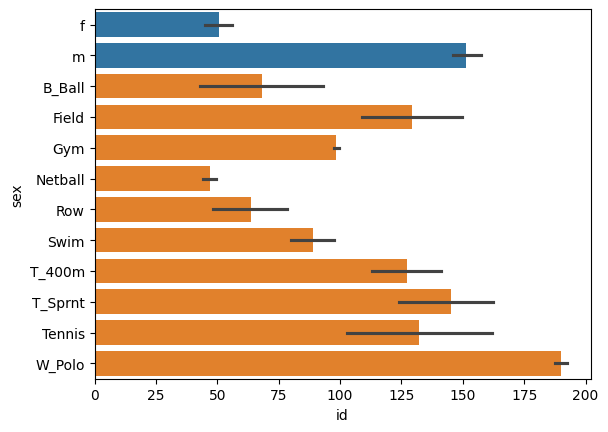

In [15]:
sns.barplot(data=ais.sex)
sns.barplot(data=ais.sport)

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [16]:
def summary_stats(df):
    ht_stats = {
        'mean': df.ht.mean(),
        'stdev': df.ht.std(),
        'min': df.ht.min(),
        'Q1': df.ht.quantile(0.25),
        'median': df.ht.median(),
        'Q3': df.ht.quantile(0.75),
        'max': df.ht.max(),
        'IQR': df.ht.quantile(0.75) - df.ht.quantile(0.25)
    }
    
    sex_counts = df.sex.value_counts()
    mode_sex = df.sex.mode().iloc[0]
    
    return ht_stats, sex_counts.to_dict(), mode_sex


In [17]:
selection1 = ais[ais.sport == 'Row']
ht_stats1, sex_counts1, mode1 = summary_stats(selection1)


In [18]:
selection2 = ais[ais.sport.isin(['Row', 'Netball', 'Tennis'])]
ht_stats2, sex_counts2, mode2 = summary_stats(selection2)


In [19]:
selection3 = ais[(ais.sport.isin(['B_Ball', 'Row'])) & (ais.sex == 'f')]
ht_stats3, sex_counts3, mode3 = summary_stats(selection3)


In [21]:
print("=== Selection 1: Rowers ===")
print("Sex Counts:", sex_counts1)
print("Sex Mode:", mode1)
print("Height Stats:")
for k, v in ht_stats1.items():
    print(f"{k}: {round(v, 3)}")
print()

print("=== Selection 2: Rowers, Netball and Tennis ===")
print("Sex Counts:", sex_counts2)
print("Sex Mode:", mode2)
print("Height Stats:")
for k, v in ht_stats2.items():
    print(f"{k}: {round(v, 3)}")
print()

print("=== Selection 3: Female Basketball and Rowers ===")
print("Sex Counts:", sex_counts3)
print("Sex Mode:", mode3)
print("Height Stats:")
for k, v in ht_stats3.items():
    print(f"{k}: {round(v, 3)}")



=== Selection 1: Rowers ===
Sex Counts: {'f': 22, 'm': 15}
Sex Mode: f
Height Stats:
mean: 182.376
stdev: 7.798
min: 156.0
Q1: 179.3
median: 181.8
Q3: 186.3
max: 198.0
IQR: 7.0

=== Selection 2: Rowers, Netball and Tennis ===
Sex Counts: {'f': 52, 'm': 19}
Sex Mode: f
Height Stats:
mean: 179.066
stdev: 7.936
min: 156.0
Q1: 174.25
median: 179.5
Q3: 183.4
max: 198.0
IQR: 9.15

=== Selection 3: Female Basketball and Rowers ===
Sex Counts: {'f': 35, 'm': 0}
Sex Mode: f
Height Stats:
mean: 180.126
stdev: 7.144
min: 156.0
Q1: 177.4
median: 179.7
Q3: 184.65
max: 195.9
IQR: 7.25


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |